In [53]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
iris = pd.read_csv('iris.csv')
iris.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 150 entries, 0 to 149
Data columns (total 5 columns):
 #   Column        Non-Null Count  Dtype  
---  ------        --------------  -----  
 0   sepal.length  150 non-null    float64
 1   sepal.width   150 non-null    float64
 2   petal.length  150 non-null    float64
 3   petal.width   150 non-null    float64
 4   variety       150 non-null    object 
dtypes: float64(4), object(1)
memory usage: 6.0+ KB


In [55]:
iris.variety.value_counts()

variety
Setosa        51
Versicolor    50
Virginica     49
Name: count, dtype: int64

In [57]:
#categorise your variety column
iris.replace({'variety':{'Setosa':0,'Versicolor':1,'Virginica':2}},inplace=True)
iris.variety.value_counts()

C:\Users\vaina\AppData\Local\Temp\ipykernel_29812\2171874386.py:1: FutureWarning: Downcasting behavior in `replace` is deprecated and will be removed in a future version. To retain the old behavior, explicitly call `result.infer_objects(copy=False)`. To opt-in to the future behavior, set `pd.set_option('future.no_silent_downcasting', True)`
  iris.replace({'variety':{'Setosa':0,'Versicolor':1,'Virginica':2}},inplace=True)


variety
0    51
1    50
2    49
Name: count, dtype: int64

In [59]:
#change variety column into integer
iris['variety'] = iris['variety'].astype(int)
iris.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 150 entries, 0 to 149
Data columns (total 5 columns):
 #   Column        Non-Null Count  Dtype  
---  ------        --------------  -----  
 0   sepal.length  150 non-null    float64
 1   sepal.width   150 non-null    float64
 2   petal.length  150 non-null    float64
 3   petal.width   150 non-null    float64
 4   variety       150 non-null    int32  
dtypes: float64(4), int32(1)
memory usage: 5.4 KB


In [61]:
Y = iris['variety']
X = iris.drop(['variety'],axis=1)

In [63]:
from sklearn.model_selection import train_test_split
from sklearn.tree import DecisionTreeClassifier
from sklearn.metrics import accuracy_score

In [83]:
X_Train,X_Test,Y_Train,Y_Test=train_test_split(X,Y,test_size=.2,random_state=1)
X_Test.shape

(30, 4)

In [85]:
treemodel = DecisionTreeClassifier(random_state=1)

In [87]:
treemodel.fit(X_Train,Y_Train)

DecisionTreeClassifier(random_state=1)

0.9333333333333333

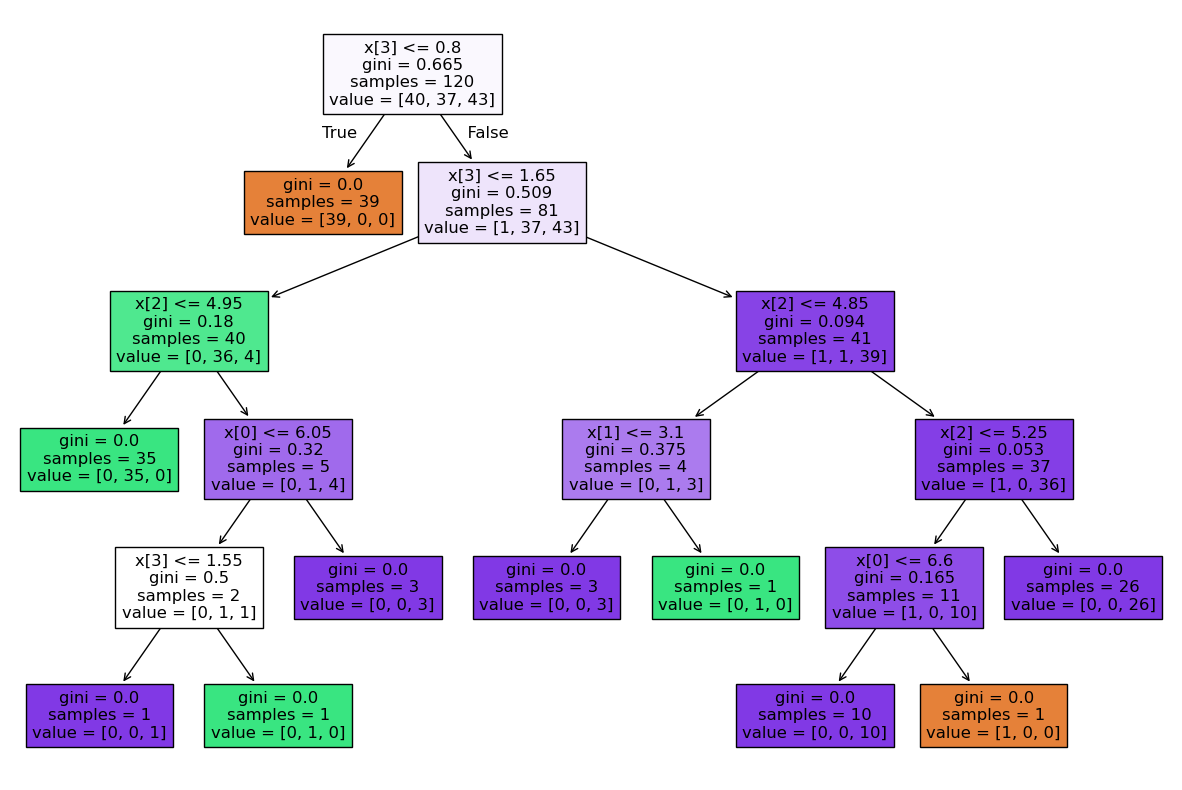

In [89]:
# draw the tree
from sklearn import tree
plt.figure(figsize=(15,10))
tree.plot_tree(treemodel,filled=True)
# predict model
Y_Predict = treemodel.predict(X_Test)
accuracy_score(Y_Test,Y_Predict)

In [93]:
treemodel1 = DecisionTreeClassifier(max_depth = 2)
treemodel1.fit(X_Train,Y_Train)

DecisionTreeClassifier(max_depth=2)

0.9666666666666667

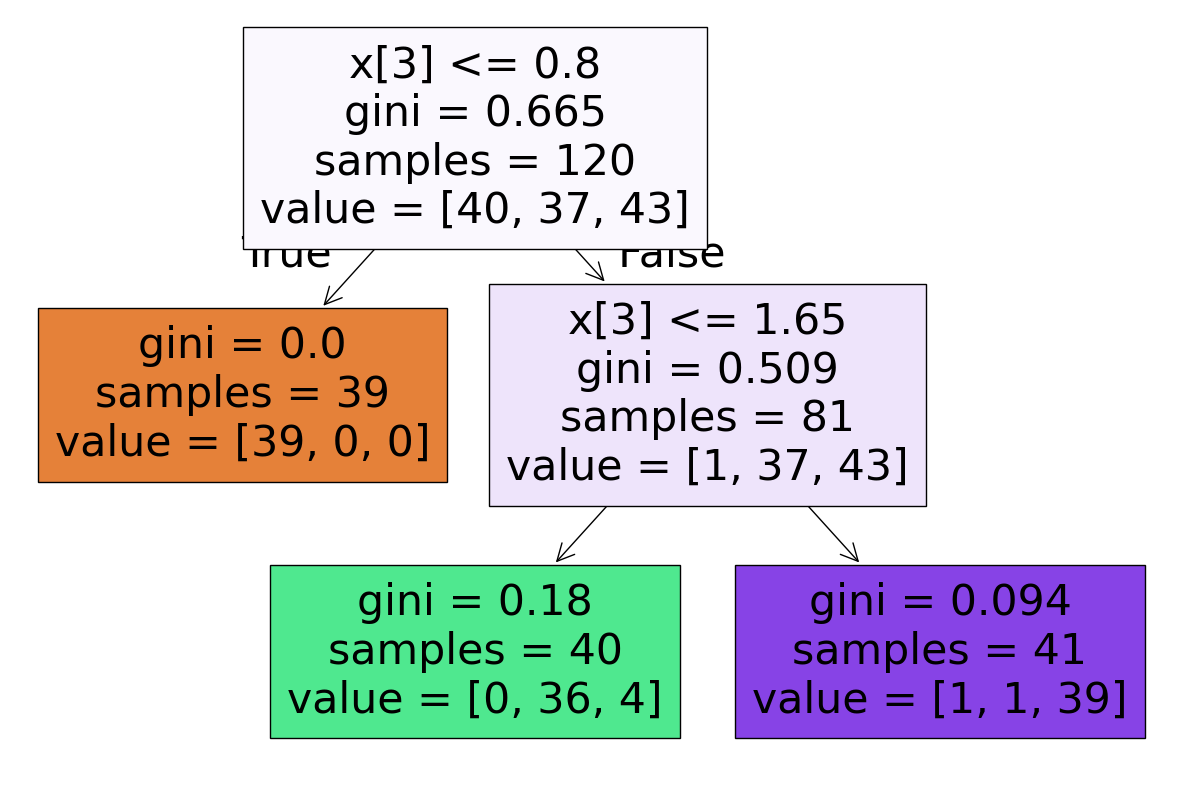

In [99]:
plt.figure(figsize=(15,10))
tree.plot_tree(treemodel1,filled=True)
# predict model
Y_Predict1 = treemodel1.predict(X_Test)
accuracy_score(Y_Test,Y_Predict1)